In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

basic_puts = pd.read_csv('data/put_performance_test.csv')
basic_puts.columns = ['requestTime', 'latency']
# Sort by requestTime
basic_puts = basic_puts.sort_values(by='requestTime')

atomic = pd.read_csv('data/atomic_performance_test.csv')
atomic.columns = ['processId', 'opId', 'latency']


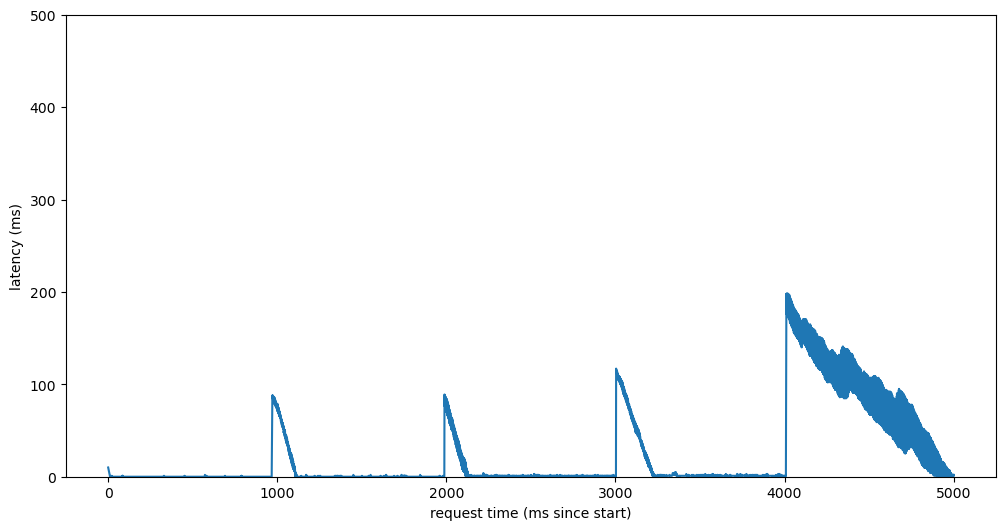

In [44]:
# Get first responseTime
first_response = basic_puts['requestTime'].min()

# Normalize requestTime to start at 0
basic_puts['requestTime'] = basic_puts['requestTime'] - first_response

# Plot the latency of the basic puts
plt.plot(basic_puts['requestTime'], basic_puts['latency'])

# Set y-axis max to 500
plt.ylim(0, 500)

plt.xlabel('request time (ms since start)')
plt.ylabel('latency (ms)')

# Set graph size
plt.gcf().set_size_inches(12, 6)
plt.show()

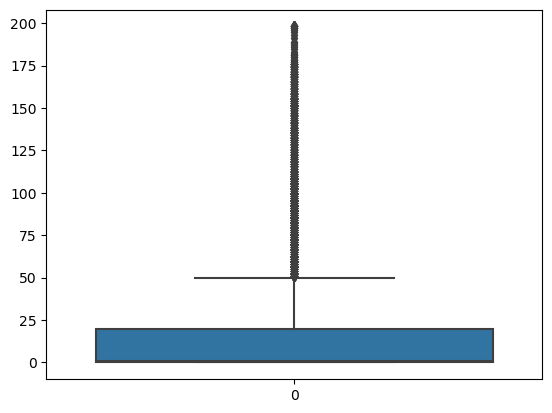

In [46]:
# Make a boxplot of responseTime
sns.boxplot(basic_puts['latency'])
plt.show()

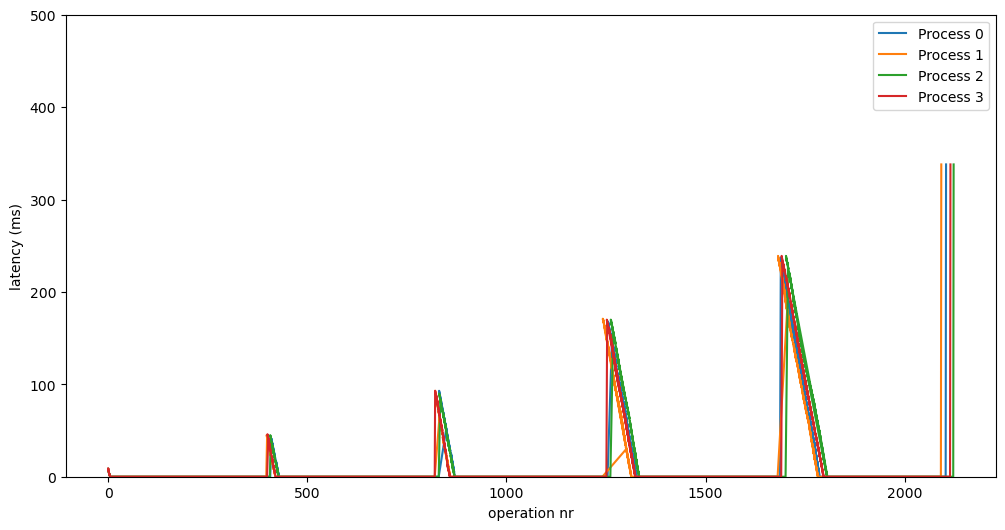

In [43]:
# Group by processId
grouped = atomic.groupby('processId')

# Visualize responseTime over opId for each processId
for name, group in grouped:
    plt.plot(group['opId'], group['latency'], label=f"Process {name}")

# Label axes
plt.xlabel('operation nr')
plt.ylabel('latency (ms)')

# Set y-axis max to 500
plt.ylim(0, 500)

# Set graph size
plt.gcf().set_size_inches(12, 6)
plt.legend()
plt.show()

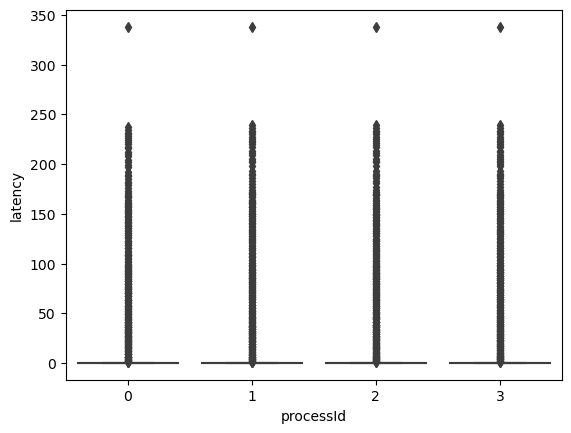

In [45]:
# Make a boxplot of responseTime for each processId
sns.boxplot(x='processId', y='latency', data=atomic)
plt.show()